# **NLP - Binary Text Classification experiments**

This project aims to compare different model architectures for a **binary text classification problem** using the Kaggle's `nlp_getting_started` dataset . The dataset consists of tweets where the task is to determine if a tweet is related to a disaster or not. The project specifically focuses on building and comparing the performance of various models on this binary classification task.

The models considered for comparison are as follows:

1. `model_0`. Naive Bayes (baseline)
2. `model_1`: Feed-forward Neural Network (dense model)
3. `model_2`: LSTM (Long Short Term Memory model)
4. `model_3`: GRU model (Gated Recurrent Unit model - simplified LSTM model)
5. `model_4`: Bidirectional-LSTM model
6. `model_5`: 1D Convolutional Neural Network
7. `model_6`: TensorFlow Hub Pretrained Feature Extractor
8. `model_7`: Same as model 6 but trained with 10% of the training data

By implementing these different architectures, the project aims to evaluate their performance and determine the most effective model for classifying disaster-related tweets accurately. The comparison will consider metrics such as **accuracy**, **precision**, **recall**, and **F1 score** to assess the models' effectiveness in handling this text classification task.

Link to the experiment's tensorboard: https://tensorboard.dev/experiment/vE3KDzyfRj6Bi9juv8NBvA/

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-06-15 09:05:05--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.111.128, 142.251.16.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-06-15 09:05:05 (90.9 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-06-15 09:05:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-06-15 09:05:06 (91.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://raw.githubusercontent.com/martgru/DeepLearning-projects/main/useful_functions_eval.py

--2023-06-15 09:05:06--  https://raw.githubusercontent.com/martgru/DeepLearning-projects/main/useful_functions_eval.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2460 (2.4K) [text/plain]
Saving to: ‘useful_functions_eval.py’

useful_functions_ev 100%[===================>]   2.40K  --.-KB/s    in 0s      

2023-06-15 09:05:06 (30.5 MB/s) - ‘useful_functions_eval.py’ saved [2460/2460]



# Preprocessing

## Preparing the data

In [ ]:
from helper_functions import unzip_data

unzip_data("nlp_getting_started.zip")

In [ ]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data[:2]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

train_text, valid_text, train_labels, valid_labels = train_test_split(train_data["text"].to_numpy(),
                                                                      train_data["target"].to_numpy(),
                                                                      test_size=0.1,
                                                                      shuffle=True,
                                                                      random_state=42)

In [ ]:
train_text[:2]

array(["'McFadden Reportedly to Test Hamstring Thursday' via @TeamStream http://t.co/jWq4KvJH2j",
       'w--=-=-=-[ NEMA warns Nigerians to prepare for drought http://t.co/5uoOPhSqU3'],
      dtype=object)

In [ ]:
avg_vocab_len = round(sum(len(sentence.split()) for sentence in train_text)/len(train_text))
avg_vocab_len

15

## Tokenization = vectorization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_len = 10000

text_vectorizer = TextVectorization(max_tokens=max_vocab_len,
                                    output_mode="int",
                                    output_sequence_length= avg_vocab_len)

# initialize text_vectorizer
text_vectorizer.adapt(train_text)
# get the vocab
words_in_vocab = text_vectorizer.get_vocabulary()

## Embedding

In [ ]:
from tensorflow.keras.layers import Embedding

text_embed = Embedding(input_dim=max_vocab_len,
                       output_dim=128,
                       input_length=avg_vocab_len)

# Building differet models

## 1) Naive-bayes baseline model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # uses tfidf formula
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and modelling pipeline
model_0 = Pipeline([
    ("tfidf",  TfidfVectorizer()), # converts words to numbers using the tfidf formula
    ("clf", MultinomialNB()), # model the text (clf -> classification)
])

# build a model --

# compile the model --

# fit the model
model_0.fit(train_text, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

### Evaluation

In [ ]:
from useful_functions_eval import evaluate
from helper_functions import calculate_results

model_0_preds = model_0.predict(valid_text)
model_0_results = calculate_results(valid_labels, model_0_preds)
evaluate(valid_labels, model_0_preds)

,accuracy,precision,recall,f1
score,77.821522,79.299226,77.821522,77.035278


## 2) Feedforeward NN model

In [ ]:
from tensorflow.keras import layers
from helper_functions import create_tensorboard_callback

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = text_embed(x)
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding
outputs = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.Model(inputs=inputs, outputs=outputs, name="FeedforewardNN_model_1")
model_1.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(train_text, train_labels, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "feedforewardNN_model_1")])

Saving TensorBoard log files to: models/feedforewardNN_model_1/20230615-090511
Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.6118 - accuracy: 0.6906 - val_loss: 0.5417 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4392 - accuracy: 0.8184 - val_loss: 0.4853 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3454 - accuracy: 0.8605 - val_loss: 0.4806 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2826 - accuracy: 0.8914 - val_loss: 0.4858 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2362 - accuracy: 0.9137 - val_loss: 0.5007 - val_accuracy: 0.7887


### Evaluation

In [ ]:
model_1_preds = model_1.predict(valid_text)
model_1_preds = tf.squeeze(tf.round(model_1_preds), axis=-1)
model_1_results = calculate_results(valid_labels, model_1_preds)
evaluate(valid_labels, model_1_preds)

24/24 [==============================] - 0s 1ms/step


,accuracy,precision,recall,f1
score,78.871391,79.130657,78.871391,78.570292


## 3) RNN model LSTM

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = text_embed(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="LSTM_model_2")
model_2.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [ ]:
history_2 = model_2.fit(train_text, train_labels, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "LSTM_model_2")])

Saving TensorBoard log files to: models/LSTM_model_2/20230615-090533
Epoch 1/5
215/215 [==============================] - 9s 28ms/step - loss: 0.2185 - accuracy: 0.9238 - val_loss: 0.6695 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1585 - accuracy: 0.9416 - val_loss: 0.6959 - val_accuracy: 0.7467
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1275 - accuracy: 0.9507 - val_loss: 0.7517 - val_accuracy: 0.7559
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1046 - accuracy: 0.9606 - val_loss: 0.9556 - val_accuracy: 0.7467
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0796 - accuracy: 0.9680 - val_loss: 1.2901 - val_accuracy: 0.7612


### Evaluation

In [ ]:
model_2_preds = model_2.predict(valid_text)
model_2_preds = tf.squeeze(tf.round(model_2_preds), axis=-1)
model_2_results = calculate_results(valid_labels, model_2_preds)
evaluate(valid_labels, model_2_preds)

24/24 [==============================] - 1s 5ms/step


,accuracy,precision,recall,f1
score,76.115486,76.052848,76.115486,75.963635


## 4) RNN model GRU

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = text_embed(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="GRU_model_3")

In [ ]:
model_3.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_3 = model_3.fit(train_text, train_labels, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "GRU_model_3")])

Saving TensorBoard log files to: models/GRU_model_3/20230615-090606
Epoch 1/5
215/215 [==============================] - 7s 20ms/step - loss: 0.1584 - accuracy: 0.9400 - val_loss: 0.8014 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0820 - accuracy: 0.9710 - val_loss: 0.8757 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0741 - accuracy: 0.9712 - val_loss: 0.8992 - val_accuracy: 0.7467
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0638 - accuracy: 0.9737 - val_loss: 1.0318 - val_accuracy: 0.7428
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0536 - accuracy: 0.9759 - val_loss: 1.0471 - val_accuracy: 0.7428


### Evaluation

In [ ]:
model_3_preds = model_3.predict(valid_text)
model_3_preds = tf.squeeze(tf.round(model_3_preds), axis=-1)
model_3_results = calculate_results(valid_labels, model_3_preds)
evaluate(valid_labels, model_3_preds)

24/24 [==============================] - 0s 3ms/step


,accuracy,precision,recall,f1
score,74.278215,74.180567,74.278215,74.141441


## 5) Bidirectional model

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = text_embed(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64, return_sequences=True))(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4 = tf.keras.Model(inputs, outputs, name="Bidirectional_model_4")

In [ ]:
model_4.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_4 = model_4.fit(train_text, train_labels, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "bidirectional_model_4")])

Saving TensorBoard log files to: models/bidirectional_model_4/20230615-090630
Epoch 1/5
215/215 [==============================] - 16s 46ms/step - loss: 0.0960 - accuracy: 0.9689 - val_loss: 0.9494 - val_accuracy: 0.7297
Epoch 2/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0547 - accuracy: 0.9761 - val_loss: 1.1229 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0497 - accuracy: 0.9777 - val_loss: 1.2381 - val_accuracy: 0.7428
Epoch 4/5
215/215 [==============================] - 9s 42ms/step - loss: 0.0425 - accuracy: 0.9778 - val_loss: 1.6489 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 9s 42ms/step - loss: 0.0411 - accuracy: 0.9800 - val_loss: 1.4499 - val_accuracy: 0.7480


### Evaluation

In [ ]:
model_4_preds = model_4.predict(valid_text)
model_4_preds = tf.squeeze(tf.round(model_4_preds), axis=-1)
model_4_results = calculate_results(valid_labels, model_4_preds)
evaluate(valid_labels, model_4_preds)

24/24 [==============================] - 1s 8ms/step


,accuracy,precision,recall,f1
score,74.80315,74.740827,74.80315,74.758994


## 6) Convolutional 1D model

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = text_embed(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_5 = tf.keras.Model(inputs, outputs, name="FeedforewardNN_model_1")

In [ ]:
model_5.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_5 = model_5.fit(train_text, train_labels, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "convolutional1D_model_5")])

Saving TensorBoard log files to: models/convolutional1D_model_5/20230615-090723
Epoch 1/5
215/215 [==============================] - 4s 14ms/step - loss: 0.1146 - accuracy: 0.9626 - val_loss: 1.1360 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.0699 - accuracy: 0.9723 - val_loss: 1.2625 - val_accuracy: 0.7454
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0585 - accuracy: 0.9756 - val_loss: 1.3078 - val_accuracy: 0.7388
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0509 - accuracy: 0.9790 - val_loss: 1.3760 - val_accuracy: 0.7388
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0489 - accuracy: 0.9799 - val_loss: 1.4245 - val_accuracy: 0.7402


### Evaluation

In [ ]:
model_5_preds = model_5.predict(valid_text)
model_5_preds = tf.squeeze(tf.round(model_5_preds), axis=-1)
model_5_results = calculate_results(valid_labels, model_5_preds)
evaluate(valid_labels, model_5_preds)

24/24 [==============================] - 0s 2ms/step


,accuracy,precision,recall,f1
score,74.015748,74.091492,74.015748,74.045448


## 7) Transfer learning model USE

In [ ]:
import tensorflow_hub as hub

use_text_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype="string", trainable=False, name="USE")

model_6 = tf.keras.Sequential([
    use_text_encoder_layer,
    layers.Dense(1, activation="sigmoid")

], name="Transferlearning_USE_model")

In [ ]:
model_6.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_6 = model_6.fit(train_text, train_labels, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "transfer-learning_use_model_6")])

Saving TensorBoard log files to: models/transfer-learning_use_model_6/20230615-090801
Epoch 1/5
215/215 [==============================] - 5s 15ms/step - loss: 0.6438 - accuracy: 0.7489 - val_loss: 0.6088 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.5778 - accuracy: 0.7911 - val_loss: 0.5587 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.5362 - accuracy: 0.7951 - val_loss: 0.5255 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.5084 - accuracy: 0.7980 - val_loss: 0.5027 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4894 - accuracy: 0.8000 - val_loss: 0.4867 - val_accuracy: 0.7861


### Evaluation

In [ ]:
model_6_preds = model_6.predict(valid_text)
model_6_preds = tf.squeeze(tf.round(model_6_preds), axis=-1)
model_6_results = calculate_results(valid_labels, model_6_preds)
evaluate(valid_labels, model_6_preds)

24/24 [==============================] - 1s 10ms/step


,accuracy,precision,recall,f1
score,78.608924,78.634564,78.608924,78.430865


## 8) Tensorflow hub pretrained feature extractor USE model trained on small amount of data

transfer learning approach is extremely useful while working with small data sets

model_7 is a replication of model_6 but trained only on 10% of training data

### Preparing the 10% of data

In [ ]:
train_data_10percent = train_data[["text","target"]].sample(frac=0.1, random_state=42)
train_text_10percent = train_data_10percent["text"].to_numpy()
train_labels_10percent = train_data_10percent["target"].to_numpy()

In [ ]:
len(train_text), len(train_text_10percent)

(6851, 761)

### Building an USE model

to **recreate a previous model** we can use

``` tf.keras.clone_model()``` method
it resets all the weights that the previous model has learnt so we can start with a new refreshed model and train it from zero

In [ ]:
use_text_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", input_shape=[], dtype="string", trainable=False, name="USE")

model_7 = tf.keras.Sequential([
    use_text_encoder_layer,
    layers.Dense(1, activation="sigmoid")
], name="transfer-learning_use_model_10percent")

In [ ]:
model_7.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_7 = model_7.fit(train_text_10percent, train_labels_10percent, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "transfer-learning_use_10percent_model_7")])

Saving TensorBoard log files to: models/transfer-learning_use_10percent_model_7/20230615-090823
Epoch 1/5
24/24 [==============================] - 3s 30ms/step - loss: 0.6828 - accuracy: 0.6202 - val_loss: 0.6755 - val_accuracy: 0.6955
Epoch 2/5
24/24 [==============================] - 0s 15ms/step - loss: 0.6706 - accuracy: 0.7227 - val_loss: 0.6641 - val_accuracy: 0.7559
Epoch 3/5
24/24 [==============================] - 1s 22ms/step - loss: 0.6594 - accuracy: 0.7700 - val_loss: 0.6534 - val_accuracy: 0.7874
Epoch 4/5
24/24 [==============================] - 1s 22ms/step - loss: 0.6487 - accuracy: 0.7871 - val_loss: 0.6429 - val_accuracy: 0.7966
Epoch 5/5
24/24 [==============================] - 1s 21ms/step - loss: 0.6385 - accuracy: 0.7937 - val_loss: 0.6331 - val_accuracy: 0.7979


### Evaluation

In [ ]:
model_7_preds = model_7.predict(valid_text)
model_7_preds = tf.squeeze(tf.round(model_7_preds), axis=-1)
model_7_results = calculate_results(valid_labels, model_7_preds)
evaluate(valid_labels, model_7_preds)

24/24 [==============================] - 0s 6ms/step


,accuracy,precision,recall,f1
score,79.790026,79.8001,79.790026,79.650568


if our model trained on 10% amount of data seems to outperform the previous one trained with all of the data

-> this unexpected result suggests that there may be a problem with the way we prepared our small dataset = **Data leakage** problem

``` Data leakage from test/validation dataset into training dataset```

it is caused by taking same samples that already exist in the validation data set and putting them into training data set

### Fixing the data leakage problem

In [ ]:
train_text_10percent_split = int(0.1*len(train_text))
train_text_10percent = train_text[:train_text_10percent_split]

train_labels_10percent_split = int(0.1*len(train_labels))
train_labels_10percent = train_labels[:train_labels_10percent_split]

In [ ]:
from tensorflow.keras.models import clone_model

model_7_fixed = clone_model(model_6)
model_7_fixed.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history_7_fixed = model_7_fixed.fit(train_text_10percent, train_labels_10percent, epochs=5, validation_data=(valid_text, valid_labels), callbacks=[create_tensorboard_callback("models", "transfer-learning_use_10percent_model_7_fixed")])

Saving TensorBoard log files to: models/transfer-learning_use_10percent_model_7_fixed/20230615-090835
Epoch 1/5
22/22 [==============================] - 3s 37ms/step - loss: 0.6817 - accuracy: 0.6642 - val_loss: 0.6815 - val_accuracy: 0.6404
Epoch 2/5
22/22 [==============================] - 0s 23ms/step - loss: 0.6695 - accuracy: 0.7358 - val_loss: 0.6720 - val_accuracy: 0.6942
Epoch 3/5
22/22 [==============================] - 1s 23ms/step - loss: 0.6578 - accuracy: 0.7766 - val_loss: 0.6632 - val_accuracy: 0.7257
Epoch 4/5
22/22 [==============================] - 1s 23ms/step - loss: 0.6474 - accuracy: 0.7927 - val_loss: 0.6546 - val_accuracy: 0.7402
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.6368 - accuracy: 0.8000 - val_loss: 0.6463 - val_accuracy: 0.7480


In [ ]:
model_7_fixed_preds = model_7_fixed.predict(valid_text)
model_7_fixed_preds = tf.squeeze(tf.round(model_7_fixed_preds), axis=-1)
model_7__fixed_results = calculate_results(valid_labels, model_7_fixed_preds)
evaluate(valid_labels, model_7_fixed_preds)

24/24 [==============================] - 0s 6ms/step


,accuracy,precision,recall,f1
score,74.80315,75.474496,74.80315,74.109313


# Comparing the models

### Table representation

In [ ]:
import pandas as pd

all_models_results = pd.DataFrame({"baseline": model_0_results, "FeedForwardNN":model_1_results, "LSTM": model_3_results, "GRU":model_4_results,
                                   "Bidirectional":model_4_results, "Conv1D":model_5_results, "Transferlearning_USE":model_6_results, "TransferLearning_USE_10percent":model_7__fixed_results})
all_models_results

,baseline,FeedForwardNN,LSTM,GRU,Bidirectional,Conv1D,Transferlearning_USE,TransferLearning_USE_10percent
accuracy,77.821522,78.871391,74.278215,74.803150,74.803150,74.015748,78.608924,74.803150
precision,0.792992,0.791307,0.741806,0.747408,0.747408,0.740915,0.786346,0.754745
recall,0.778215,0.788714,0.742782,0.748031,0.748031,0.740157,0.786089,0.748031
f1,0.770353,0.785703,0.741414,0.747590,0.747590,0.740454,0.784309,0.741093


In [ ]:
all_models_results.transpose()

,accuracy,precision,recall,f1
baseline,77.821522,0.792992,0.778215,0.770353
FeedForwardNN,78.871391,0.791307,0.788714,0.785703
LSTM,74.278215,0.741806,0.742782,0.741414
GRU,74.803150,0.747408,0.748031,0.747590
Bidirectional,74.803150,0.747408,0.748031,0.747590
Conv1D,74.015748,0.740915,0.740157,0.740454
Transferlearning_USE,78.608924,0.786346,0.786089,0.784309
TransferLearning_USE_10percent,74.803150,0.754745,0.748031,0.741093


In [ ]:
all_models_results = all_models_results.transpose()
all_models_results["accuracy"] = all_models_results["accuracy"]/100

### Plots

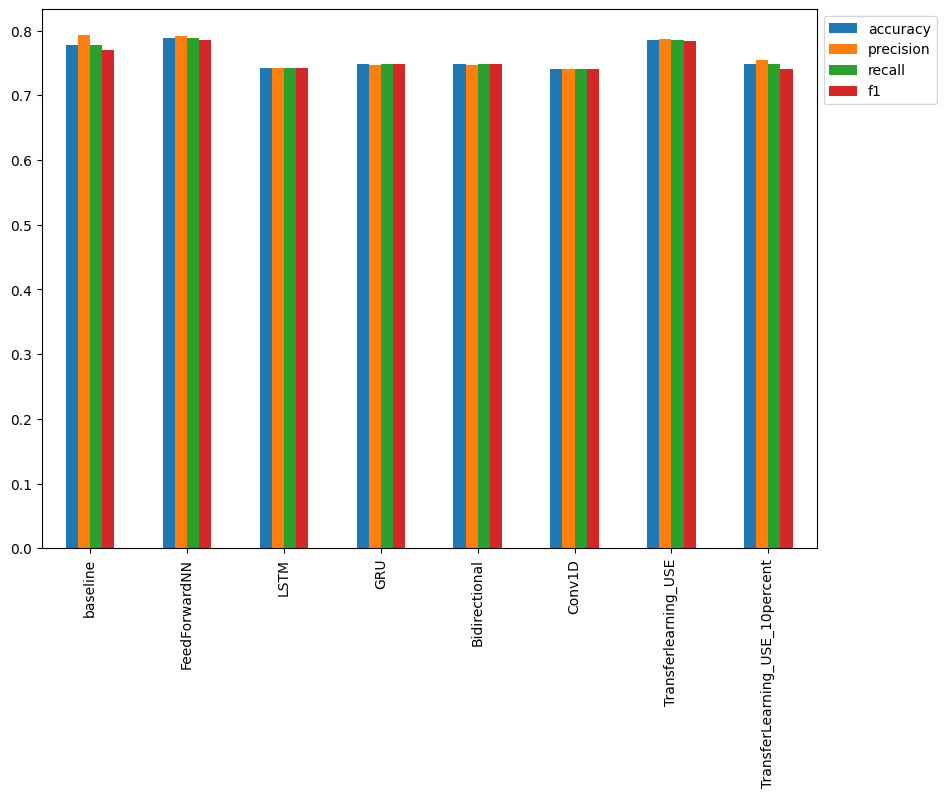

In [ ]:
all_models_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

<Axes: >

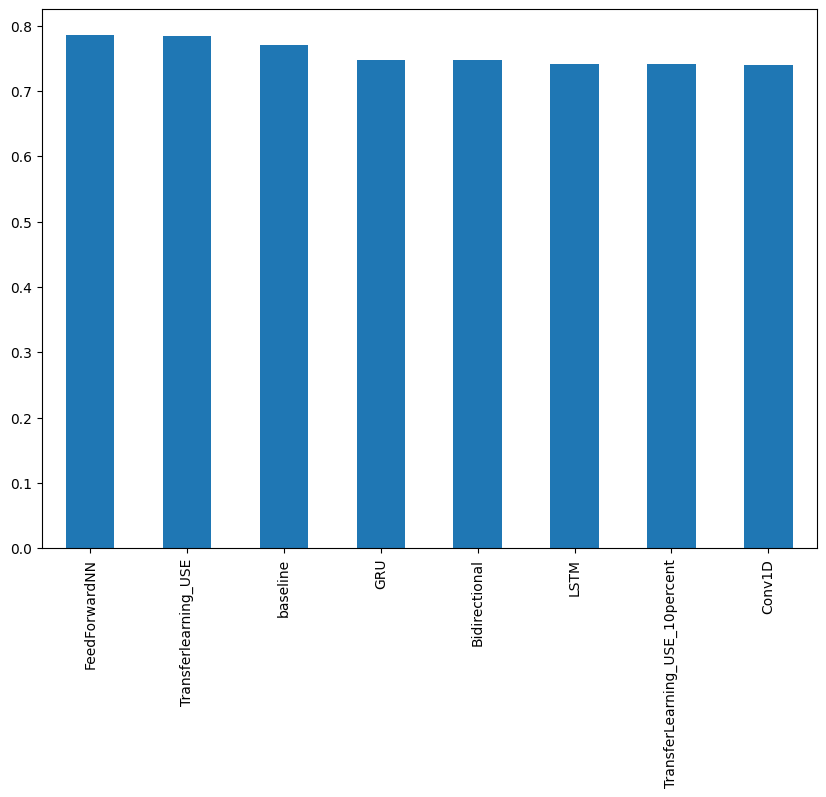

In [ ]:
all_models_results.sort_values('f1', ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

# Saving the best performing model

There are two main formats:

1. `HDF5`
2. `SavedModel`

In [ ]:
model_6.save("Transfer-learning_USE_model.h5")